In [1]:
# 导入的库
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import tensorflow as tf

print(tf.__version__)


2.3.0


In [2]:
#获取数据集
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y, classes= load_dataset()

In [3]:
print(train_set_x_orig.shape)
print(train_set_y)
print(classes)

(209, 64, 64, 3)
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
[b'non-cat' b'cat']


y= [1] cat


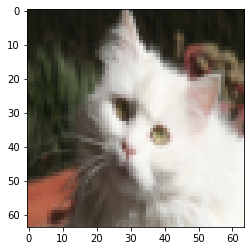

In [4]:
# 显示一张图
index = 102
plt.imshow(train_set_x_orig[index])
print("y=",str(train_set_y[:,index]),classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [6]:
# 转换成1维数据

train_set_x_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)
print(train_set_x_flat.shape)
print(train_set_x_flat.shape)

# # 将
# train_set_x_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
# test_set_x_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
# print(train_set_x_flat.shape)
# print(test_set_x_flat.shape)

# 将数据归一化，方便训练模型
train_set_x = train_set_x_flat/255.
test_set_x = test_set_x_flat/255.

(209, 12288)
(209, 12288)


### 搭建简单的单层模型

模型搭建的过程：
- 定义模型的框架
- 初始化模型中用到的参数
- 训练参数
    - 前向计算
    - 反向计算
    - 更新参数

In [ ]:
# 参数变量
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(tf.zeros_like(b0,dtype=tf.float32))

class LinearRegression:
    # 定义模型的正向传播
    def __call__(self,x):
        return x@w+b

    def loss_func(self,y_true,y_pred):
        # 计算真实标签与预测值的差值平方
        return tf.reduce_mean((y_true-y_pred)**2/2)

# 构建模型
model = LinearRegression()

In [11]:
b0 = tf.constant([[3.0]])
b0.shape

train_set_y[0,1]

0

In [50]:
# 参数变量定义及初始化
w = tf.Variable(tf.random.normal(shape=([train_set_x.shape[1],1])))
b = tf.Variable(tf.zeros(shape=([1,1])))
# 构建模型
class dnnModle:
    def __call__(self,x):
        return tf.sigmoid(x@w+b)
    
    def loss_func(self,y_true,y_pred):
        eps = 1e-7
        #将预测值限制在 1e-7 以上, 1 - 1e-7 以下，避免log(0)错误
        y_pred = tf.clip_by_value(y_pred,eps,1.0-eps)
        # 交叉熵损失函数计算
        cross_loss =tf.reduce_mean(-y_true*tf.math.log(y_pred)-(1-y_true)*tf.math.log(1-y_pred))
        return cross_loss

model = dnnModle()
        

In [51]:
data = tf.constant(shape=(train_set_x[0,:],1),dtype='float32')
data=tf.reshape(data,(1,data.shape[0]))

print(data.shape)
print(w.shape)
a = data@w
print(a)

TypeError: constant() missing 1 required positional argument: 'value'

In [77]:
# 训练模型
epochs = 1000
lr = 0.001



for epoch in range(epochs):
    # 遍历每一张图片
 
    data =  tf.constant(value=train_set_x,shape = (train_set_x.shape),dtype='float32')
    # print(data.shape)
    with tf.GradientTape() as gt:
        y_pred = model(data)
        loss = model.loss_func(train_set_y[0,i],y_pred)

    # 计算反向传播误差
    loss_dw,loss_db = gt.gradient(loss,[w,b])

    w.assign(w-lr*loss_dw)
    b.assign(b-lr*loss_db)

    if epoch % 100 == 0:
        tf.print("epoch:\t",epoch,"\tloss:\t",loss)

epoch:	 0 	loss:	 0.0782967806
epoch:	 100 	loss:	 0.0782128572
epoch:	 200 	loss:	 0.0781353191
epoch:	 300 	loss:	 0.07806357
epoch:	 400 	loss:	 0.0779969394
epoch:	 500 	loss:	 0.077935122
epoch:	 600 	loss:	 0.0778773427
epoch:	 700 	loss:	 0.077823177
epoch:	 800 	loss:	 0.0777723342
epoch:	 900 	loss:	 0.0777245


In [88]:
## 测试模型
print(test_set_x.shape)
right_count = 0
for i in range(test_set_x.shape[0]):
    y_pred = model(test_set_x[i,:].reshape(1,test_set_x.shape[1]))
    if abs(test_set_y[0,i] - y_pred)<0.5:
        right_count +=1

print("test correct: ",right_count/float(test_set_x.shape[0]))


## 测试模型
print(train_set_x.shape)
right_count = 0
for i in range(train_set_x.shape[0]):
    y_pred = model(train_set_x[i,:].reshape(1,train_set_x.shape[1]))
    if abs(train_set_y[0,i] - y_pred)<0.5:
        right_count +=1

print("train correct: ",right_count/float(train_set_x.shape[0]))


(50, 12288)
test correct:  0.34
(209, 12288)
train correct:  0.6507177033492823
